In [11]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

np.set_printoptions(edgeitems=4, threshold=20)

In [14]:
A = np.array([[-1, 0.4, 0.8], [1, 0, 0], [0, 1, 0]])
b = np.array([1, 0, 0.3])
x_des = np.array([7, 2, -6])
N = 30

Solving the minimum fuel optimal control problem using LP


In [18]:
columns = [np.linalg.matrix_power(A, N - i - 1) @ b for i in range(N)]
M = np.column_stack(columns)

u = cp.Variable(N)
y = cp.Variable(N)
p = cp.Variable(N)
obj = cp.Minimize(np.ones(N) @ p)
cons = [M @ u == x_des, -y <= u, u <= y, y <= p, 2 * y <= np.ones(N) + p]

prob = cp.Problem(obj, cons)
prob.solve()
prob.status, prob.value, u.value

('optimal',
 np.float64(17.323567852402086),
 array([ 2.68889433e-10,  2.62068484e-10, -6.45783878e-09,  1.00000000e+00,
        ...,  3.34963732e-08,  6.54586554e-10,  1.39747222e-10,
         3.18903110e+00], shape=(30,)))

In [26]:
u.value.tolist()

[2.688894327179289e-10,
 2.620684839533579e-10,
 -6.4578387834712395e-09,
 1.0000000004119807,
 -1.0000000006764738,
 0.9999999987033277,
 -1.0579906247504106e-09,
 5.1073310086698476e-11,
 6.044844547007163e-10,
 -0.9999999974944418,
 1.000000000482874,
 -1.0000000001208342,
 0.2466241189098645,
 -3.6027688325561004e-10,
 -1.0556502447010709e-10,
 1.4897144876384769e-09,
 -0.9999999984043477,
 1.0000000004591858,
 -0.9999999981116142,
 2.5206548017732563e-09,
 -5.0210302267060353e-11,
 -1.910988128815388e-10,
 0.9999999980156978,
 -0.6988814943344882,
 1.0000000005908394,
 -7.043809307839508e-10,
 3.349637318895587e-08,
 6.545865544863116e-10,
 1.3974722174679362e-10,
 3.18903110197515]

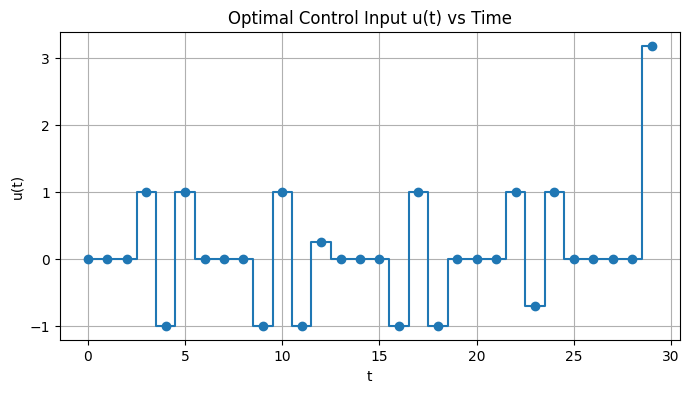

In [28]:
plt.figure(figsize=(8, 4))
# plt.plot(range(N), u.value, marker="o")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Optimal Control Input u(t) vs Time")
plt.grid(True)
plt.step(range(N), u.value, where="mid", marker="o", linestyle="-")
plt.show()